# Hopfield Network

In [1]:
import numpy as np

class HopfieldNetwork:
    def __init__(self, size):
        self.size = size
        self.weights = np.zeros((size, size))

    def train(self, patterns):
        for pattern in patterns:
            pattern = np.reshape(pattern, (self.size, 1))
            self.weights += np.dot(pattern, pattern.T)
        np.fill_diagonal(self.weights, 0)  # Remove self-connections

    def recall(self, pattern, steps=10):
        pattern = np.reshape(pattern, (self.size, 1))
        for _ in range(steps):
            pattern = np.sign(np.dot(self.weights, pattern))
        return pattern.flatten()

patterns = np.array([[-1, 1, -1, 1], [1, -1, 1, -1]])
hopfield = HopfieldNetwork(size=4)
hopfield.train(patterns)

test_pattern = np.array([-1, 1, -1, -1])
recalled_pattern = hopfield.recall(test_pattern)
print("Recalled Pattern:", recalled_pattern)

Recalled Pattern: [-1.  1. -1.  1.]


# Universal Approximation Theorem

Epoch 0, Loss: 0.5561890006065369
Epoch 100, Loss: 0.343618780374527
Epoch 200, Loss: 0.13720661401748657
Epoch 300, Loss: 0.04819193482398987
Epoch 400, Loss: 0.028349928557872772
Epoch 500, Loss: 0.02016056329011917
Epoch 600, Loss: 0.024670513346791267
Epoch 700, Loss: 0.016652192920446396
Epoch 800, Loss: 0.015310507267713547
Epoch 900, Loss: 0.014106814749538898


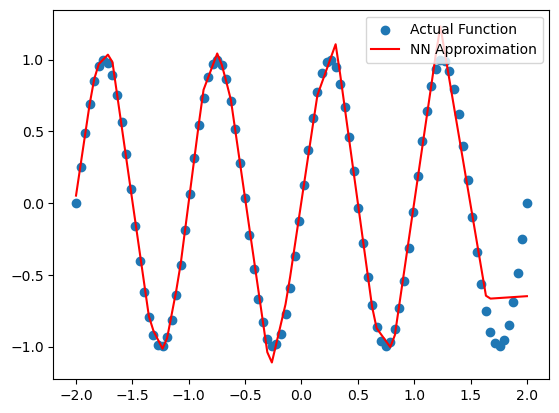

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

class UniversalApproximator(nn.Module):
    def __init__(self):
        super(UniversalApproximator, self).__init__()
        self.fc1 = nn.Linear(1, 10)  # Input layer to hidden layer
        self.fc2 = nn.Linear(10, 10)  # Hidden layer
        self.fc3 = nn.Linear(10, 1)  # Hidden layer to output

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Generate training data
x = np.linspace(-2, 2, 100).reshape(-1, 1)
y = np.sin(2 * np.pi * x)  # Function to approximate

x_train = torch.tensor(x, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32)

# Initialize model, loss function, and optimizer
model = UniversalApproximator()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Test the trained model
y_pred = model(x_train).detach().numpy()

# Plot results
plt.scatter(x, y, label="Actual Function")
plt.plot(x, y_pred, label="NN Approximation", color="red")
plt.legend()
plt.show()